# **1. Import Library**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# **2. Memuat Dataset**

In [174]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [175]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [177]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


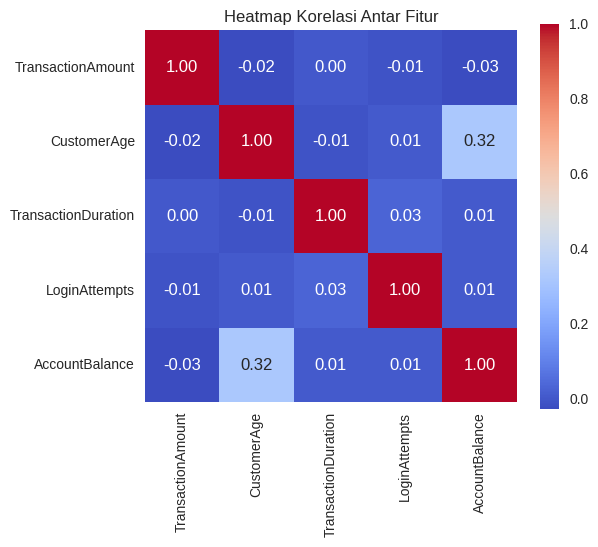

In [178]:
# Korelasi antar fitur (Opsional Skilled)
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

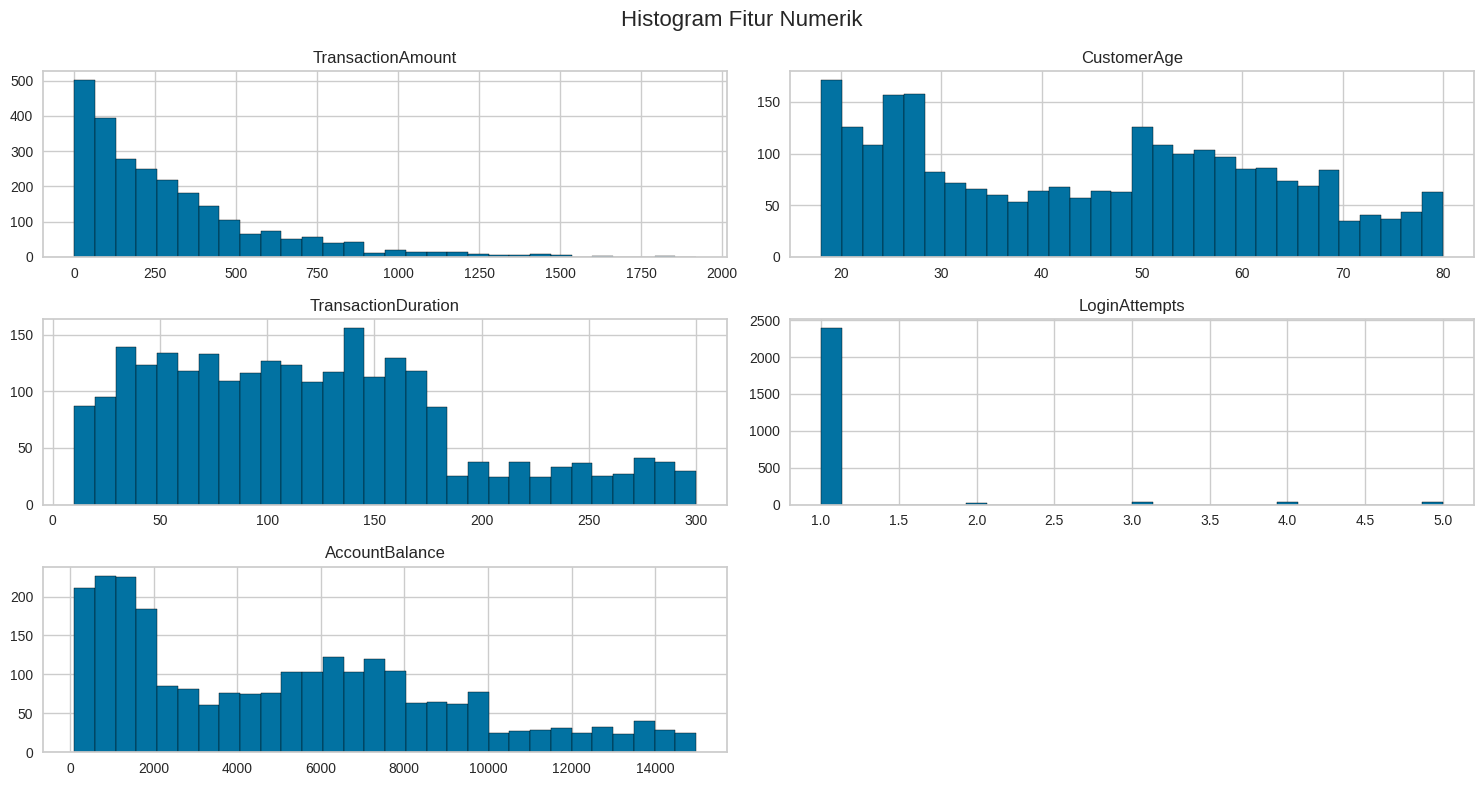

In [179]:
# Histogram numerik (Opsional Skilled)
numeric_df = df.select_dtypes(include='number')
numeric_df.hist(bins=30, figsize=(15, 8), edgecolor='black')
plt.suptitle("Histogram Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

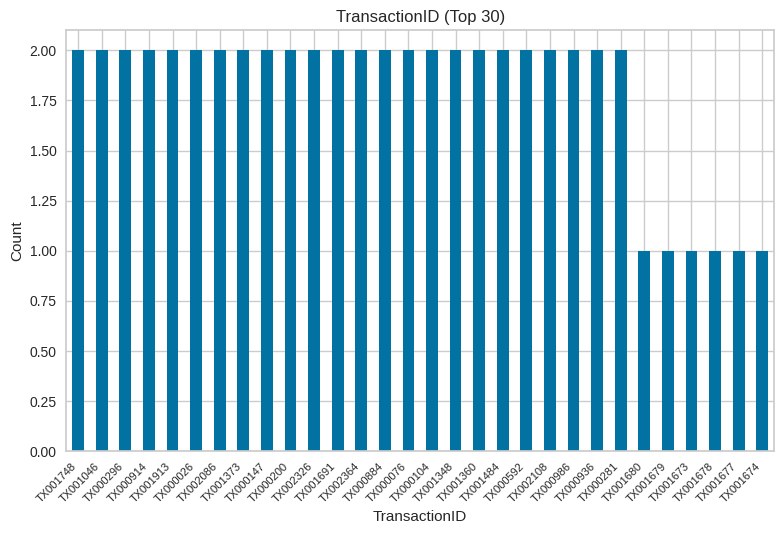

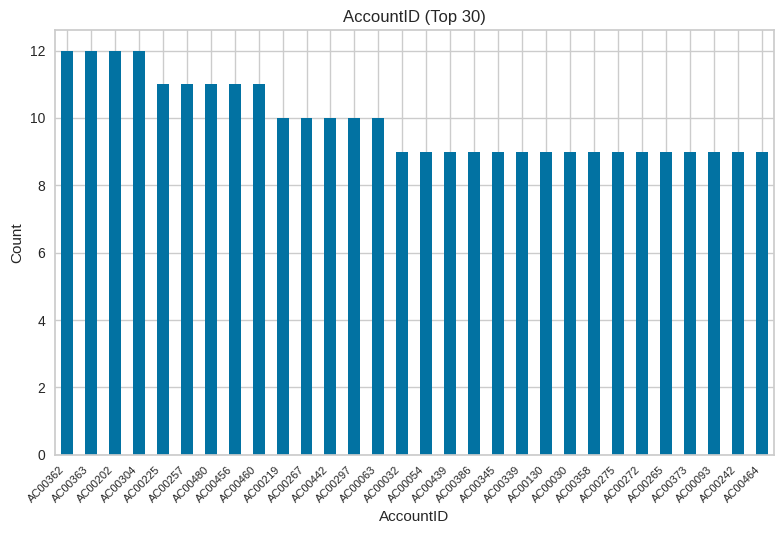

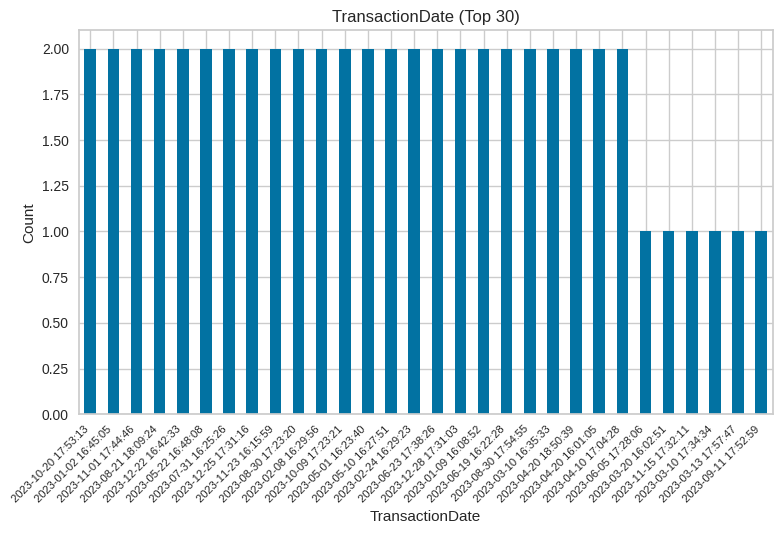

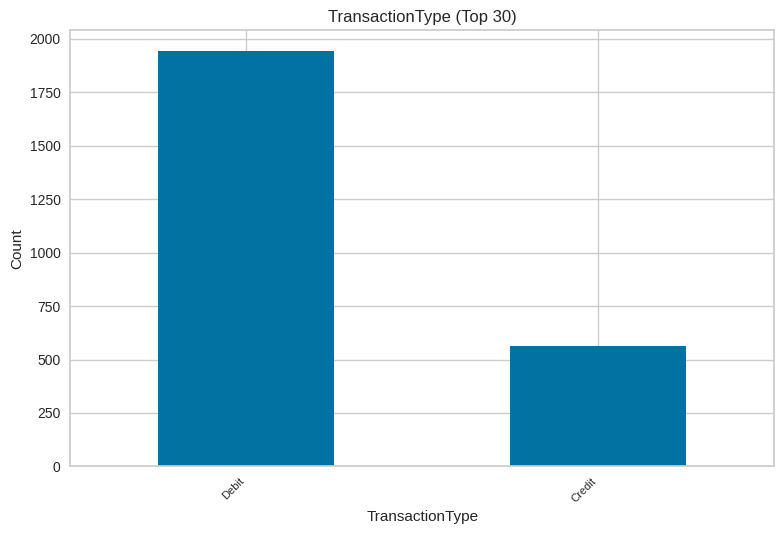

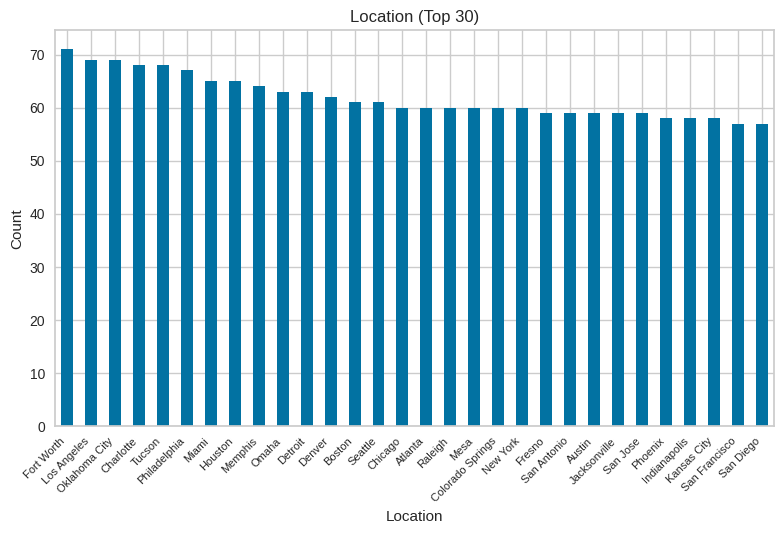

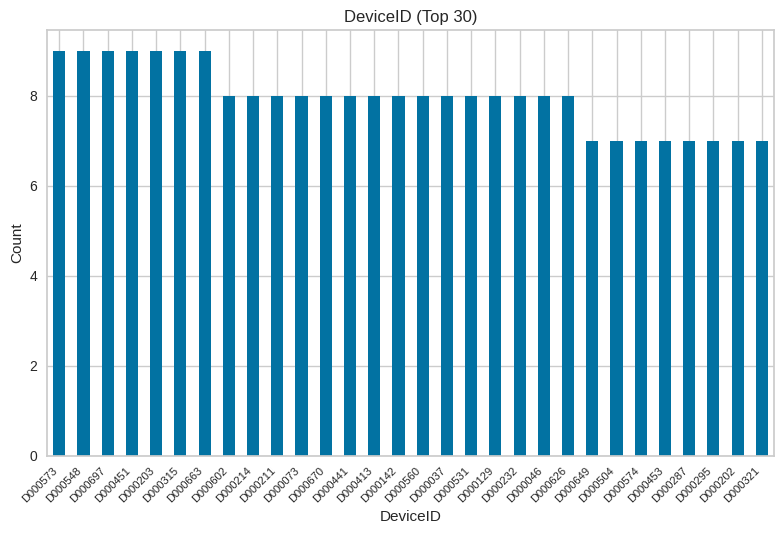

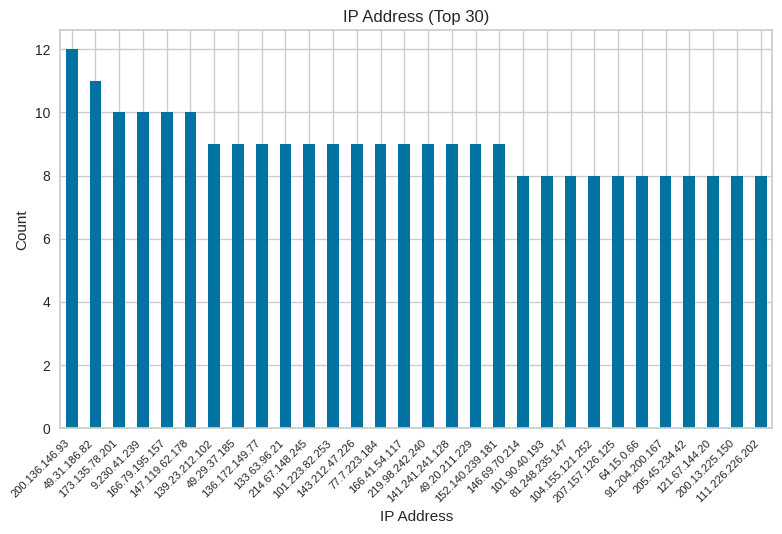

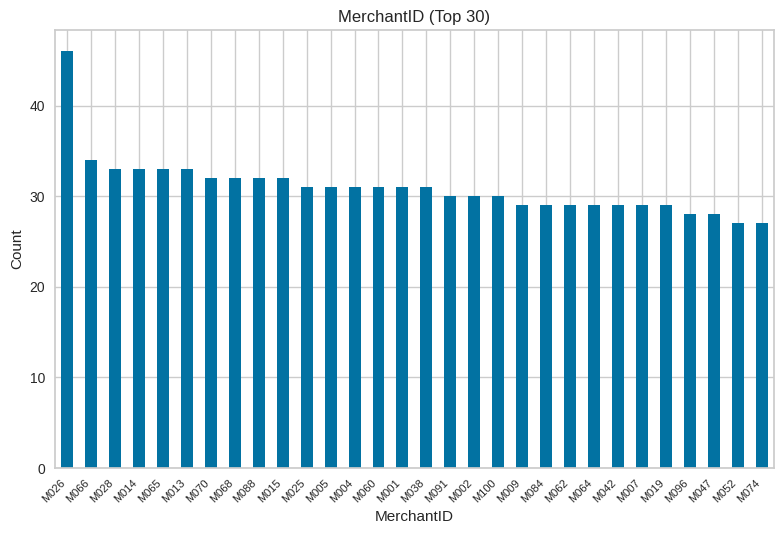

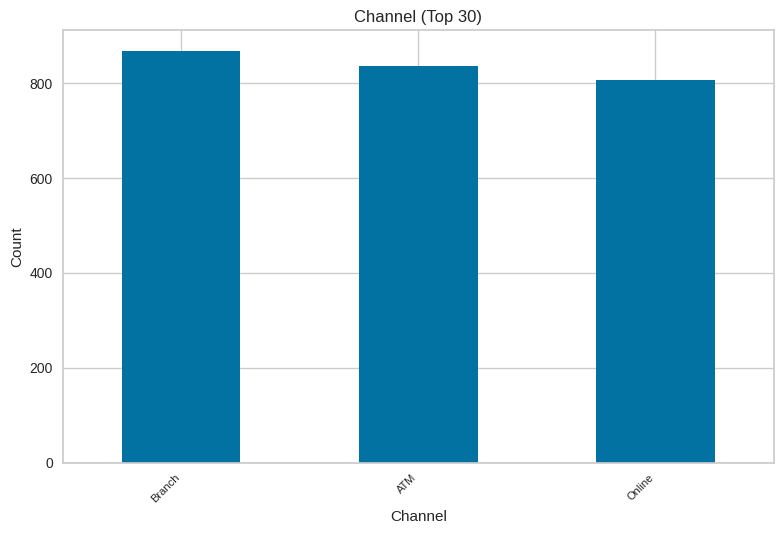

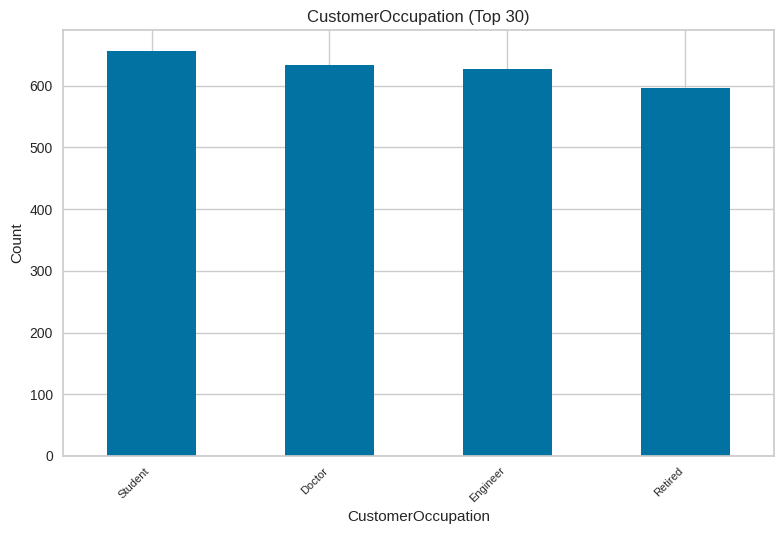

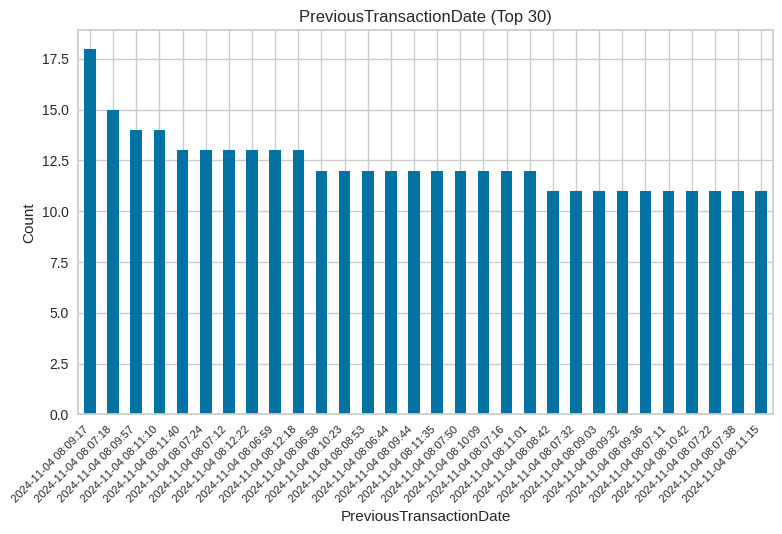

In [180]:
# Barplot kategorikal (Opsional Skilled)
for col in df.select_dtypes(include='object'):
    df[col].value_counts().head(30).plot(kind='bar')
    plt.title(f'{col} (Top 30)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.tight_layout()
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [181]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

In [182]:
# Cek missing value
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [183]:
# Cek duplikat
print(df.duplicated().sum())

21


In [184]:
# Scaling numerik
scaler = StandardScaler()
cols_to_scale = df.select_dtypes(include='number').columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [185]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
drop_cols = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']
drop_cols = [col for col in drop_cols if col in df.columns]
df = df.drop(columns=drop_cols)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [186]:
# Encoding kategorikal
encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [187]:
# List kolom
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [188]:
df = df.dropna().drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [189]:
# Handling outlier (Opsional Advanced)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[~outlier_mask]
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1662.000000,1662.000000
mean,-0.155869,1242.495187,1.0,21.375451,0.925993,-0.019284,1.531889,-0.005530,-2.046294e-01,-0.011096,182.354994
std,0.732855,729.956974,0.0,12.405785,0.842110,0.995828,1.154999,1.010158,3.637075e-15,0.986914,103.488718
min,-1.017881,0.000000,1.0,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.753645,614.250000,1.0,11.000000,0.000000,-0.991288,0.000000,-0.833844,-2.046294e-01,-0.936142,95.000000
50%,-0.355874,1235.500000,1.0,21.000000,1.000000,-0.038043,2.000000,-0.113081,-2.046294e-01,-0.102401,183.000000
75%,0.251850,1873.750000,1.0,32.000000,2.000000,0.803056,3.000000,0.621956,-2.046294e-01,0.643057,271.000000
max,2.072523,2485.000000,1.0,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000


In [190]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**

In [191]:
# Describe setelah cleaning
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1662.000000,1662.000000
mean,-0.155869,1242.495187,1.0,21.375451,0.925993,-0.019284,1.531889,-0.005530,-2.046294e-01,-0.011096,182.354994
std,0.732855,729.956974,0.0,12.405785,0.842110,0.995828,1.154999,1.010158,3.637075e-15,0.986914,103.488718
min,-1.017881,0.000000,1.0,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.753645,614.250000,1.0,11.000000,0.000000,-0.991288,0.000000,-0.833844,-2.046294e-01,-0.936142,95.000000
50%,-0.355874,1235.500000,1.0,21.000000,1.000000,-0.038043,2.000000,-0.113081,-2.046294e-01,-0.102401,183.000000
75%,0.251850,1873.750000,1.0,32.000000,2.000000,0.803056,3.000000,0.621956,-2.046294e-01,0.643057,271.000000
max,2.072523,2485.000000,1.0,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000


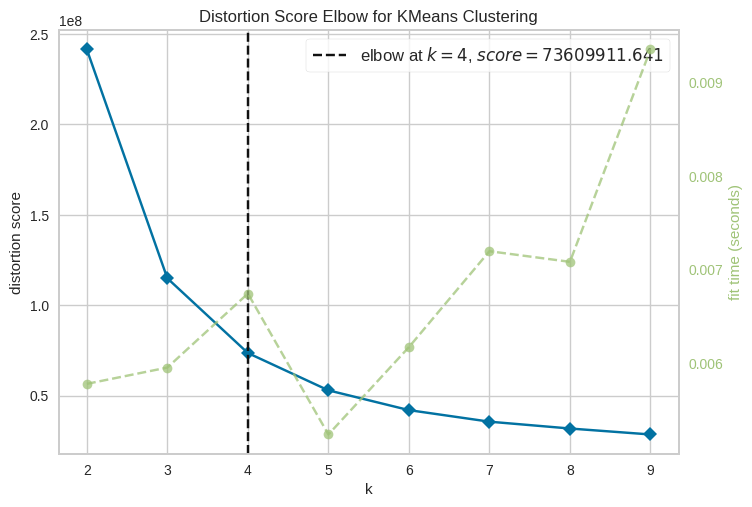

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [192]:
# Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df)
visualizer.show()

In [193]:
# KMeans clustering
model_kmeans = KMeans(n_clusters=4, random_state=42)
model_kmeans.fit(df)

df['Target'] = model_kmeans.labels_

In [194]:
# Simpan model
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

In [195]:
# Silhouette Score (Opsional Skilled)
print('Silhouette Score:', silhouette_score(df.drop('Target', axis=1), df['Target']))

Silhouette Score: 0.49700172565658884


In [196]:
# Membuat visualisasi hasil clustering

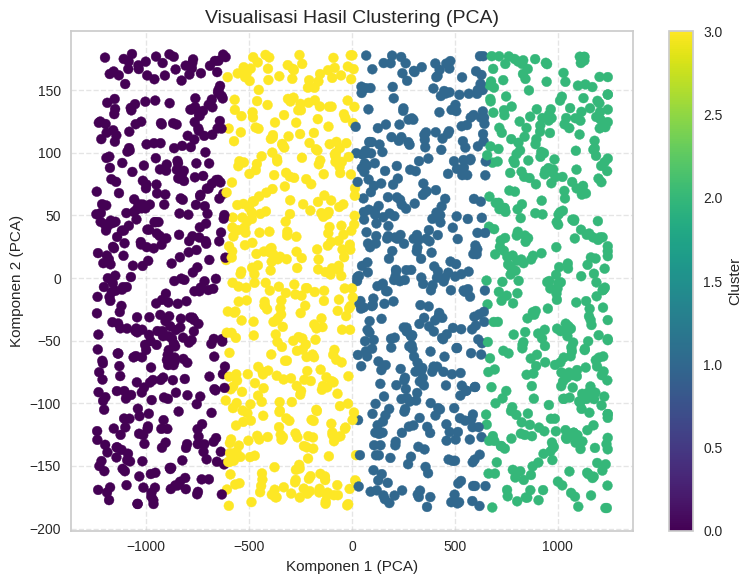

In [197]:
# Visualisasi PCA (Opsional Skilled/Advanced)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df.drop('Target', axis=1))
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['Target'], cmap='viridis', s=50)
plt.title("Visualisasi Hasil Clustering (PCA)", fontsize=14)
plt.xlabel("Komponen 1 (PCA)")
plt.ylabel("Komponen 2 (PCA)")
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [198]:
# Membangun model menggunakan PCA.

In [199]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

In [200]:
# Analisis deskriptif cluster
df.groupby('Target').agg(['mean', 'min', 'max','median','std']).stack()

<ipython-input-200-9b672bca0d2d>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.groupby('Target').agg(['mean', 'min', 'max','median','std']).stack()


TransactionAmount  TransactionDate  TransactionType   Location  \
Target                                                                          
0      mean            -0.135829       307.713615              1.0  21.485915   
       min             -1.015827         0.000000              1.0   0.000000   
       max              1.985656       628.000000              1.0  43.000000   
       median          -0.331625       310.000000              1.0  22.000000   
       std              0.730367       182.143699              0.0  12.326768   
1      mean            -0.113908      1575.085158              1.0  21.124088   
       min             -1.017676      1260.000000              1.0   0.000000   
       max              2.023990      1892.000000              1.0  43.000000   
       median          -0.314905      1570.000000              1.0  21.000000   
       std              0.739833       184.728648              0.0  12.383966   
2      mean            -0.190581      2208.708229              1.0  21.842893   
       min             -1.017881      1894.000000              1.0   0.000000   
       max              2.050618      2485.000000              1.0  43.000000   
       median          -0.373227      2216.000000              1.0  22.000000   
       std              0.715472       179.451601              0.0  12.508507   
3      mean            -0.183847       945.492925              1.0  21.066038   
       min             -1.013945       629.000000              1.0   0.000000   
       max              2.072523      1262.000000              1.0  43.000000   
       median          -0.393095       946.500000              1.0  21.000000   
       std              0.744547       185.779732              0.0  12.437280   

                Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
Target                                                                          
0      mean    0.913146    -0.116229            1.488263            -0.043762   
       min     0.000000    -1.495947            0.000000            -1.561745   
       max     3.000000     1.980594            4.000000             2.563023   
       median  1.000000    -0.262336            1.000000            -0.148762   
       std     0.822888     0.972662            1.164617             1.009792   
1      mean    0.878345     0.003433            1.637470             0.066681   
       min     0.000000    -1.495947            0.000000            -1.547472   
       max     3.000000     1.980594            4.000000             2.563023   
       median  1.000000     0.074104            2.000000             0.008236   
       std     0.849558     1.009961            1.135871             1.026194   
2      mean    0.982544     0.013416            1.456359            -0.017818   
       min     0.000000    -1.495947            0.000000            -1.561745   
       max     3.000000     1.980594            4.000000             2.577295   
       median  1.000000     0.018031            1.000000            -0.177307   
       std     0.837970     0.983411            1.146174             0.983627   
3      mean    0.931604     0.025172            1.544811            -0.025493   
       min     0.000000    -1.495947            0.000000            -1.533199   
       max     3.000000     1.980594            4.000000             2.548750   
       median  1.000000     0.046067            2.000000            -0.134489   
       std     0.857475     1.013570            1.168083             1.019651   

               LoginAttempts  AccountBalance  PreviousTransactionDate  
Target                                                                 
0      mean        -0.204629       -0.032748               184.896714  
       min         -0.204629       -1.285856                 1.000000  
       max         -0.204629        2.522155               360.000000  
       median      -0.204629       -0.152704               191.000000  
       std       

### **Cluster 0: Nasabah Lama, Digital, Saldo Menengah**

* **TransactionDate (rata-rata 307)**
  Nasabah ini sudah terdaftar cukup lama, tapi bukan yang paling lama.
* **TransactionAmount (rata-rata -0.13)**
  Rata-rata transaksi lebih kecil dari rata-rata populasi, cenderung jarang melakukan transaksi besar.
* **Channel (rata-rata 0.91)**
  Sebagian besar transaksi dilakukan lewat layanan digital ("Online"), meski kemungkinan masih ada sedikit ATM/Branch.
* **CustomerOccupation (rata-rata 1.49)**
  Mayoritas berprofesi engineer atau sudah pensiun.
* **AccountBalance (rata-rata -0.03)**
  Saldo tabungan menengah ke bawah.
* **LoginAttempts (rata-rata -0.20)**
  Hampir tidak pernah terjadi kesalahan saat login.
* **PreviousTransactionDate (median 191)**
  Aktivitas transaksi masih cukup rutin, belum terlalu jarang.

**Segmentasi Pasar:**
Nasabah ini sudah lama menjadi pengguna bank, lebih nyaman dengan transaksi online, banyak berasal dari kalangan pekerja teknik atau pensiunan, saldo dan transaksi rata-rata saja.

**Risiko Fraud:**
Risiko fraud rendah, karena pola akses dan transaksi stabil, serta aktivitas login tanpa banyak error.

---

### **Cluster 1: Nasabah Digital Aktif, Umur Menengah**

* **TransactionDate (rata-rata 1575)**
  Masa keanggotaan sudah cukup lama, tapi bukan yang paling loyal.
* **TransactionAmount (rata-rata -0.11)**
  Nilai transaksi cenderung kecil, tidak banyak transaksi besar.
* **Channel (rata-rata 0.87)**
  Masih lebih banyak transaksi online, meski lebih beragam channel-nya.
* **CustomerOccupation (rata-rata 1.63)**
  Banyak yang sudah pensiun, sebagian pelajar atau profesional muda.
* **AccountBalance (rata-rata -0.05)**
  Saldo rata-rata, sedikit di bawah rata-rata populasi.
* **LoginAttempts (rata-rata -0.20)**
  Login sangat stabil, jarang error.
* **PreviousTransactionDate (median 184)**
  Masih cukup aktif, jarak antar transaksi tidak terlalu lama.

**Segmentasi Pasar:**
Nasabah dengan masa keanggotaan menengah hingga lama, masih aktif bertransaksi online, banyak dari pensiunan dan pelajar. Transaksi dan saldo cenderung kecil.

**Risiko Fraud:**
Risiko fraud sangat rendah, mengingat aktivitas login stabil dan tidak ada anomali.

---

### **Cluster 2: Nasabah Loyal & Senior, Aktif Digital**

* **TransactionDate (rata-rata 2208)**
  Ini adalah kelompok nasabah paling lama bergabung.
* **TransactionAmount (rata-rata -0.19)**
  Nominal transaksi kecil dan jarang melakukan transaksi besar.
* **Channel (rata-rata 0.98)**
  Hampir seluruh transaksi dilakukan lewat online.
* **CustomerOccupation (rata-rata 1.46)**
  Mayoritas engineer dan pensiunan, dengan sedikit variasi.
* **AccountBalance (rata-rata 0.07)**
  Saldo sedikit lebih tinggi dibanding cluster lain.
* **LoginAttempts (rata-rata -0.20)**
  Login tanpa kendala berarti.
* **PreviousTransactionDate (median 183)**
  Masih rutin bertransaksi.

**Segmentasi Pasar:**
Nasabah yang paling lama menjadi anggota dan cenderung setia menggunakan layanan digital. Banyak yang sudah pensiun atau berprofesi sebagai engineer. Saldo sedikit di atas rata-rata kelompok lain, namun transaksi tidak besar.

**Risiko Fraud:**
Risiko fraud sangat rendah karena konsistensi perilaku, jarang ada error login, dan channel hampir selalu sama.

---

### **Cluster 3: Nasabah Lama, Tidak Aktif & Saldo Rendah**

* **TransactionDate (rata-rata 945)**
  Sudah lama jadi nasabah, tapi tidak aktif.
* **TransactionAmount (rata-rata -0.18)**
  Nilai transaksi kecil, sangat jarang transaksi besar.
* **Channel (rata-rata 0.93)**
  Masih menggunakan layanan digital, meskipun tidak seintens cluster lain.
* **CustomerOccupation (rata-rata 1.54)**
  Banyak pensiunan dan pelajar.
* **AccountBalance (rata-rata -0.03)**
  Saldo cenderung rendah.
* **LoginAttempts (rata-rata -0.20)**
  Tidak ada masalah login.
* **PreviousTransactionDate (median 177)**
  Jarak antar transaksi lebih lama, jarang melakukan aktivitas.

**Segmentasi Pasar:**
Nasabah lama yang cenderung tidak aktif, saldo kecil, banyak dari kelompok pensiunan atau mahasiswa. Kemungkinan besar hanya menyimpan akun tanpa aktivitas rutin.

**Risiko Fraud:**
Risiko fraud sedikit lebih tinggi dibanding cluster lain, karena akun yang jarang digunakan berpotensi lebih mudah disalahgunakan, apalagi bila tiba-tiba ada aktivitas tidak wajar.


# **6. Mengeksport Data**

In [201]:
# Simpan data clustering
df.to_csv('data_clustering.csv', index=False)

In [202]:
# Inverse scaler & encoder untuk interpretasi asli (opsional advanced)
df_inverse = df.copy()

for col, le in encoders.items():
    df_inverse[col] = le.inverse_transform(df_inverse[col])
df_inverse[cols_to_scale] = scaler.inverse_transform(df_inverse[cols_to_scale])

In [203]:
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,3
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,3
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,3


In [204]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

In [205]:
# Fitur numerik: mean, min, max, median, std (opsional advanced)
num_cols = df_inverse.select_dtypes(include=['int64', 'float64']).columns
df_inverse.groupby('Target')[num_cols].agg(['mean', 'min', 'max','median','std']).stack()

<ipython-input-205-04a380d1b159>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_inverse.groupby('Target')[num_cols].agg(['mean', 'min', 'max','median','std']).stack()


TransactionAmount  CustomerAge  TransactionDuration  \
Target                                                               
0      mean           257.970986    42.605634           116.356808   
       min              0.860000    18.000000            10.000000   
       max            877.810000    80.000000           299.000000   
       median         200.765000    40.000000           109.000000   
       std            213.392771    17.346283            70.750660   
1      mean           264.375620    44.739659           124.094891   
       min              0.320000    18.000000            11.000000   
       max            889.010000    80.000000           299.000000   
       median         205.650000    46.000000           120.000000   
       std            216.158743    18.011456            71.899817   
2      mean           241.973965    44.917706           118.174564   
       min              0.260000    18.000000            10.000000   
       max            896.790000    80.000000           300.000000   
       median         188.610000    45.000000           107.000000   
       std            209.040929    17.537979            68.917410   
3      mean           243.941439    45.127358           117.636792   
       min              1.410000    18.000000            12.000000   
       max            903.190000    80.000000           298.000000   
       median         182.805000    45.500000           110.000000   
       std            217.536018    18.075827            71.441425   

               LoginAttempts  AccountBalance  
Target                                        
0      mean              1.0     4985.811925  
       min               1.0      102.200000  
       max               1.0    14942.780000  
       median            1.0     4518.320000  
       std               0.0     3803.716640  
1      mean              1.0     4916.368248  
       min               1.0      101.250000  
       max               1.0    14852.420000  
       median            1.0     4405.280000  
       std               0.0     3740.691936  
2      mean              1.0     5403.393367  
       min               1.0      145.500000  
       max               1.0    14977.990000  
       median            1.0     5500.560000  
       std               0.0     3902.022054  
3      mean              1.0     4988.965708  
       min               1.0      129.290000  
       max               1.0    14904.900000  
       median            1.0     4583.350000  
       std               0.0     3930.592150

In [206]:
# Fitur kategorikal: modus per cluster (opsional advanced)
cat_cols = [col for col in df_inverse.columns if df_inverse[col].dtype == 'object' and col not in ['TransactionDate', 'PreviousTransactionDate']]

for col in cat_cols:
    print(f"\n{col.upper()}")
    for cluster in sorted(df_inverse['Target'].unique()):
        cluster_data = df_inverse[df_inverse['Target'] == cluster]
        value_counts = cluster_data[col].value_counts(normalize=True)
        print(f"  Cluster {cluster}:")
        for val, prop in value_counts.items():
            print(f"    {val}: {prop:.2%}")


TRANSACTIONTYPE
  Cluster 0:
    Debit: 100.00%
  Cluster 1:
    Debit: 100.00%
  Cluster 2:
    Debit: 100.00%
  Cluster 3:
    Debit: 100.00%

LOCATION
  Cluster 0:
    Tucson: 3.82%
    Charlotte: 3.82%
    Miami: 3.58%
    Boston: 3.58%
    Raleigh: 3.34%
    Las Vegas: 3.34%
    Seattle: 3.10%
    Oklahoma City: 3.10%
    Mesa: 3.10%
    San Francisco: 3.10%
    Los Angeles: 3.10%
    Omaha: 2.86%
    Memphis: 2.86%
    Dallas: 2.86%
    Fresno: 2.63%
    Denver: 2.63%
    Philadelphia: 2.39%
    San Diego: 2.39%
    Chicago: 2.39%
    Sacramento: 2.39%
    Fort Worth: 2.39%
    Colorado Springs: 2.15%
    Kansas City: 2.15%
    Austin: 2.15%
    Houston: 2.15%
    Atlanta: 2.15%
    Milwaukee: 1.91%
    San Antonio: 1.91%
    Jacksonville: 1.91%
    El Paso: 1.91%
    Indianapolis: 1.91%
    Phoenix: 1.91%
    Baltimore: 1.67%
    Nashville: 1.67%
    Louisville: 1.67%
    Columbus: 1.67%
    Virginia Beach: 1.67%
    San Jose: 1.43%
    New York: 1.43%
    Detroit: 1.19%
    Po

### **Cluster 0: Mahasiswa ATM, Saldo Bervariasi, Channel ATM/Branch/Online**

* **TransactionAmount (mean: 257.971; median: 200.765; min: 860; max: 877.810)**
  Nominal transaksi cenderung menengah, namun bervariasi dari sangat kecil hingga sangat besar.
* **AccountBalance (mean: 4.985.812; median: 4.518.320; min: 195.662; max: 16.799.460)**
  Saldo tabungan cukup tinggi, tetapi sangat bervariasi.
* **Channel:**
  ATM (38.06%), Branch (34.04%), Online (27.90%)
  Transaksi terbagi antara ATM, Branch, dan Online, namun ATM paling dominan.
* **CustomerOccupation:**
  Student (27.36%), Doctor (26.65%), Engineer (26.42%), Retired (19.58%)
  Komposisi nasabah cukup merata di antara pelajar, dokter, engineer, dan pensiunan.
* **Location:**
  Kota transaksi sangat beragam, tidak ada satu kota yang mendominasi (Charlotte paling besar, hanya 3.82%).
* **LoginAttempts (median: 1)**
  Stabil, tanpa error berarti.
* **TransactionDuration (median: 109 detik; mean: 116 detik)**
  Lama transaksi konsisten.
* **CustomerAge (median: 40 tahun; mean: 43 tahun)**
  Usia produktif, cenderung muda.

**Segmentasi Pasar:**
Cluster ini diisi nasabah dari berbagai profesi, transaksi menengah, dengan pilihan channel cukup seimbang antara ATM, Branch, dan Online. Komposisi pekerjaan nasabah sangat beragam.

**Risiko Fraud:**
Risiko rendah, karena perilaku login dan channel cenderung stabil dan tidak didominasi satu pola.

---

### **Cluster 1: Mahasiswa ATM, Transaksi Konsisten, Channel ATM Dominan**

* **TransactionAmount (mean: 264.376; median: 205.650; min: 320; max: 889.010)**
  Nominal transaksi menengah dengan sebaran cukup sempit.
* **AccountBalance (mean: 4.916.369; median: 4.405.280; min: 237.067; max: 9.889.291)**
  Saldo tabungan rata-rata menengah, tidak sevariatif cluster 0.
* **Channel:**
  ATM (41.98%), Branch (31.36%), Online (26.67%)
  ATM masih menjadi channel utama, branch dan online cukup signifikan.
* **CustomerOccupation:**
  Student (28.33%), Retired (25.62%), Engineer (24.63%), Doctor (21.43%)
  Dominasi pelajar, namun pensiunan, engineer, dan dokter juga signifikan.
* **Location:**
  Kota transaksi sangat beragam, dengan Denver yang tertinggi (3.93%), selebihnya <4%.
* **LoginAttempts (median: 1)**
  Tidak ada error login.
* **TransactionDuration (median: 120 detik; mean: 124 detik)**
  Lama transaksi sedikit lebih panjang dari cluster 0.
* **CustomerAge (median: 46 tahun; mean: 45 tahun)**
  Usia sedikit lebih tua, kemungkinan mahasiswa senior.

**Segmentasi Pasar:**
Didominasi pelajar, dengan aktivitas channel ATM utama, namun penggunaan Branch dan Online juga signifikan. Kota transaksi tersebar.

**Risiko Fraud:**
Risiko sangat rendah, perilaku channel dan login sangat stabil, komposisi profesi dan kota tidak terpusat.

---

### **Cluster 2: Dokter ATM, Saldo Tertinggi, Channel Lebih Merata**

* **TransactionAmount (mean: 241.974; median: 188.610; min: 260; max: 896.790)**
  Nominal transaksi cenderung kecil dan stabil.
* **AccountBalance (mean: 5.403.393; median: 5.550.560; min: 279.233; max: 16.231.759)**
  Saldo tabungan tertinggi dari semua cluster, variasi cukup besar.
* **Channel:**
  ATM (35.10%), Branch (34.09%), Online (30.81%)
  Penggunaan channel lebih merata, ATM hanya sedikit lebih banyak dari Branch dan Online.
* **CustomerOccupation:**
  Doctor (27.32%), Engineer (25.56%), Student (24.56%), Retired (22.56%)
  Mayoritas dokter, diikuti engineer, pelajar, dan pensiunan dengan komposisi seimbang.
* **Location:**
  Tidak ada kota dominan (Tucson 3.80% tertinggi, selebihnya tersebar).
* **LoginAttempts (median: 1)**
  Sangat stabil.
* **TransactionDuration (median: 107 detik; mean: 118 detik)**
  Konsisten.
* **CustomerAge (median: 45 tahun; mean: 45 tahun)**
  Usia produktif.

**Segmentasi Pasar:**
Cluster ini cukup unik karena komposisi profesi lebih banyak dokter, saldo tinggi, dan penggunaan channel sangat merata.

**Risiko Fraud:**
Risiko rendah, perilaku login/channel stabil, dan persebaran kota/profesi sangat beragam.

---

### **Cluster 3: Mahasiswa ATM, Transaksi Kecil, Channel ATM Masih Dominan**

* **TransactionAmount (mean: 243.941; median: 182.805; min: 1.410; max: 903.190)**
  Nominal transaksi lebih kecil, variasi tetap tinggi.
* **AccountBalance (mean: 4.988.966; median: 4.583.350; min: 212.978; max: 12.242.334)**
  Saldo menengah, cenderung sedikit lebih rendah dari cluster 2.
* **Channel:**
  ATM (39.76%), Online (30.95%), Branch (29.29%)
  Channel ATM masih paling sering, online lebih banyak dari branch dibanding cluster lain.
* **CustomerOccupation:**
  Student (26.73%), Doctor (26.01%), Retired (24.11%), Engineer (23.15%)
  Didominasi pelajar, namun dokter dan profesi lain cukup seimbang.
* **Location:**
  Fresno (3.57%), selebihnya tersebar tipis.
* **LoginAttempts (median: 1)**
  Konsisten, tanpa error.
* **TransactionDuration (median: 110 detik; mean: 117 detik)**
  Tidak jauh beda dari cluster lain.
* **CustomerAge (median: 45,5 tahun; mean: 45 tahun)**
  Usia produktif.

**Segmentasi Pasar:**
Didominasi pelajar, transaksi nominal kecil, channel ATM masih utama namun online meningkat, saldo cenderung rata. Tidak ada kota atau profesi yang terlalu dominan.

**Risiko Fraud:**
Risiko rendah, tidak ada anomali channel maupun login, persebaran profesi dan kota relatif rata.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [207]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# sudah dilakukan diatas

In [208]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)